# Project 1: EDA

### Notebook for the first project with the Dataset "King_County_House"

Author: Marlene Lütje

---

# Content

1. Getting to know the Data
    * Column Names and Descriptions
    * Data Period
    * Missing Data
        * waterfront
        * view
        * sqft_basement
        * yr_renovated
2. Data Exploration
    * The Variables
    * Looking at the Targetvariable: Price
    * Dependencies of the Variables
3. Correlation Analysis
    * Multiple Regression Model
    * Train- and Testset
    * MAPE
    * Dummy Variables
4. Recommendations

_5. Lasso and Ridge Regression_

---

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import re 
import math

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

---

# Getting to know the data

## Column Names and Descriptions
1. **id** - unique identified for a house
2. **date** - house was sold
3. **price** -  is prediction target
4. **bedrooms** -  of Bedrooms/House
5. **bathrooms** -  of bathrooms/bedrooms
6. **sqft_living** -  footage of the home
7. **sqft_lot** -  footage of the lot
8. **floors** -  floors (levels) in house
9. **waterfront** - House which has a view to a waterfront
10. **view** - Has been viewed
11. **condition** - How good the condition is ( Overall )
12. **grade** - overall grade given to the housing unit, based on King County grading system
13. **sqft_above** - square footage of house apart from basement
14. **sqft_basement** - square footage of the basement
15. **yr_built** - Built Year
16. **yr_renovated** - Year when house was renovated
17. **zipcode** - zip
18. **lat** - Latitude coordinate
19. **long** - Longitude coordinate
20. **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
21. **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df = pd.read_csv("King_County_House_prices_dataset.csv", na_values= ["?"," "])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21597, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


## Data period

In [7]:
df.select_dtypes(include='object').head()

,date
0,10/13/2014
1,12/9/2014
2,2/25/2015
3,12/9/2014
4,2/18/2015


In [8]:
df.date = pd.to_datetime(df.date)
df.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [9]:
# check the first and last date within the data set:
df.date.min(), df.date.max()


(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [10]:
date_day = df.date.apply(lambda d: d.day)
date_day.name = 'date_day'

date_month = df.date.apply(lambda d: d.month)
date_month.name = 'date_month'

date_year = df.date.apply(lambda d: d.year)
date_year.name = 'date_year'

df = pd.concat([df, date_day, date_month, date_year], axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,9,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,25,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,18,2,2015


## Missing Data

In [11]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

,Number,Percentage
waterfront,2376,11.0
view,63,0.3
sqft_basement,454,2.1
yr_renovated,3842,17.8


Of the 21 variables four have missing values. 
- **waterfront** has 11 % missing values 
- **view** has no values for 0.3 % of instances
- **sqft_basement** is not known in 2.1 % of all cases
- **yr_renovated** is missing in 17.8 % (This is not a variable that has to be filled, as not all houses have to be renovated.)

### waterfront-variable

In [12]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [13]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

It seems that zero and NaN are different things:
* NaN could be a missing value
* 0/1 means that the house has a waterfront or not

To fill the missing values, we use the nearest non-NaN neighbor based on longitude and latitude.

In [14]:
# For more information, please check: https://stackoverflow.com/questions/46344762/ (Gapfilling missing data at specific latitude/longitude by nearest known neighbours)

def find_closest(x, df):
    # supress itself
    d = x.drop(x.name).to_dict()
    # sort the distance
    v = sorted(d, key=lambda k: d[k])
    
    # find the closest with a non-nan waterfront value, else return nan
    for i in v :
        if i in df[~df.waterfront.isnull()].index:
            return df.loc[i].waterfront
        else:
            pass
    return np.nan

# find the geographic distance between each house and all remaining houses
df_matrix_distance = pd.DataFrame(euclidean_distances(df[["lat","long"]]))

# get the null values in waterfront
df_nan = df[df.waterfront.isnull()]
df_nan

# get the values
res = df_matrix_distance.loc[df_nan.index].apply(lambda x: find_closest(x,df), axis=1).to_dict()

# fill the values
df_raw = df.copy()
for k,v in res.items():
    df.loc[k,"waterfront"] = v

In [15]:
# check whether it worked: before
print(df_raw.waterfront.isna().sum())
df_raw.waterfront.value_counts()

2376


0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [16]:
# check whether it worked: after
print(df.waterfront.isna().sum())
df.waterfront.value_counts()

0


0.0    21439
1.0      158
Name: waterfront, dtype: int64

In [17]:
# old dataframe
fig = px.scatter(df, x = "long", y = "lat", color = "waterfront")                
fig.write_html("plots/scatter_waterfront_old.html")

# new dataframe
fig = px.scatter(df_raw, x = "long", y = "lat", color = "waterfront")                
fig.write_html("plots/scatter_waterfront_new.html")

### view-variable

In [18]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [19]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

The NaN and zero seem to have different meanings again:
* NaN could be a missing value
* 0 means zero views

The missing values are padded with zero.

In [20]:
df.loc[df.view.isna(), 'view'] = 0
df.view.isna().sum()

0

### sqft_basement-variable

To check for the meaning of ```sqft_basement```, let's look at the relationship between ```sqft_basement```, ```sqft_above``` and ```sqft_living```:

In [21]:
sqft_above_plus_basement = df.sqft_above + df.sqft_basement
sqft_living = df.sqft_living
fig_scatter = px.scatter(df, x = sqft_above_plus_basement, y = "sqft_living", labels = {"x":'sqft above + sqft basement'}, trendline = "ols", trendline_color_override = "white")

fig_scatter.write_html("plots/scatter_sqft_living.html")

In [22]:
all(sqft_living[sqft_above_plus_basement.notna()] == sqft_above_plus_basement[sqft_above_plus_basement.notna()])

True

So:
```sqft_basement = sqft_living - sqft_above```

### yr_renovated-variable

In [23]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [24]:
df.yr_renovated.value_counts()[0.0]

17011

```yr_renovated``` has a lot of missing values. It's possible that these house with a missing values or the value zero haven't been renovated by now.
Therefore we introduce a new variable ```renovated```.

In [25]:
renovated = df.yr_renovated.copy()
renovated[renovated > 0] = 1
renovated.name = 'renovated'
 
df = pd.concat([df, renovated], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,13,10,2014,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,9,12,2014,1.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,NaN,98028,47.7379,-122.233,2720,8062,25,2,2015,NaN
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,9,12,2014,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,18,2,2015,0.0


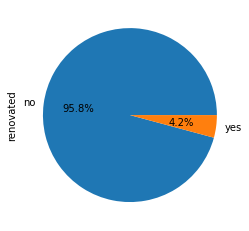

In [26]:
df.renovated.value_counts().plot(kind='pie', labels=['no','yes'], autopct='%1.1f%%');

In [27]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date_day            0
date_month          0
date_year           0
renovated        3842
dtype: int64

---

# Data Exploration

## The Variables

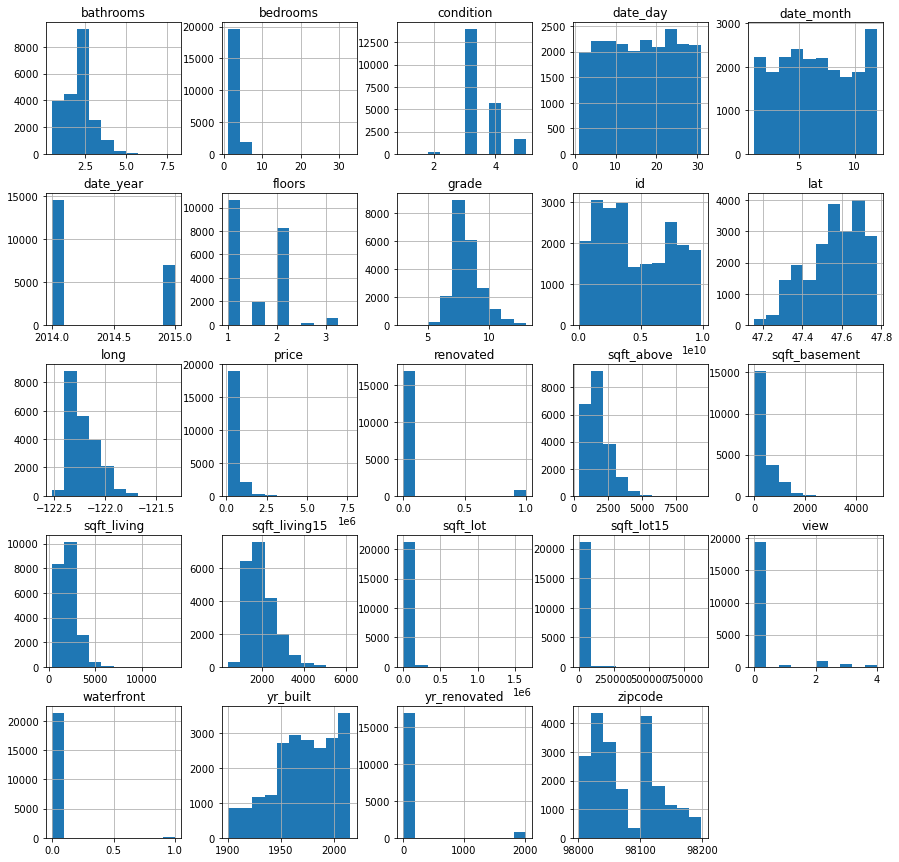

In [28]:
fig = df.hist(figsize=(15,15));

In [29]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,...,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,...,83.64,98077.95,47.56,-122.21,1986.62,12758.28,15.69,6.57,2014.32,0.04
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.76,0.65,...,399.95,53.51,0.14,0.14,685.23,27274.44,8.63,3.12,0.47,0.20
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,...,0.00,98001.00,47.16,-122.52,399.00,651.00,1.00,1.00,2014.00,0.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,...,0.00,98033.00,47.47,-122.33,1490.00,5100.00,8.00,4.00,2014.00,0.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,...,0.00,98065.00,47.57,-122.23,1840.00,7620.00,16.00,6.00,2014.00,0.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,...,0.00,98118.00,47.68,-122.12,2360.00,10083.00,23.00,9.00,2015.00,0.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,31.00,12.00,2015.00,1.00


Outlier with 33 Bedrooms: is likely an input error.

In [30]:
df.query('bedrooms == 33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,0.0,98103,47.6878,-122.331,1330,4700,25,6,2014,0.0


In [31]:
df.drop(15856, axis=0, inplace=True)

## Looking at the Targetvariable: Price

In [32]:
fig = px.box(df, x = "price", hover_data = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot"])

fig.write_html("plots/box_price.html")

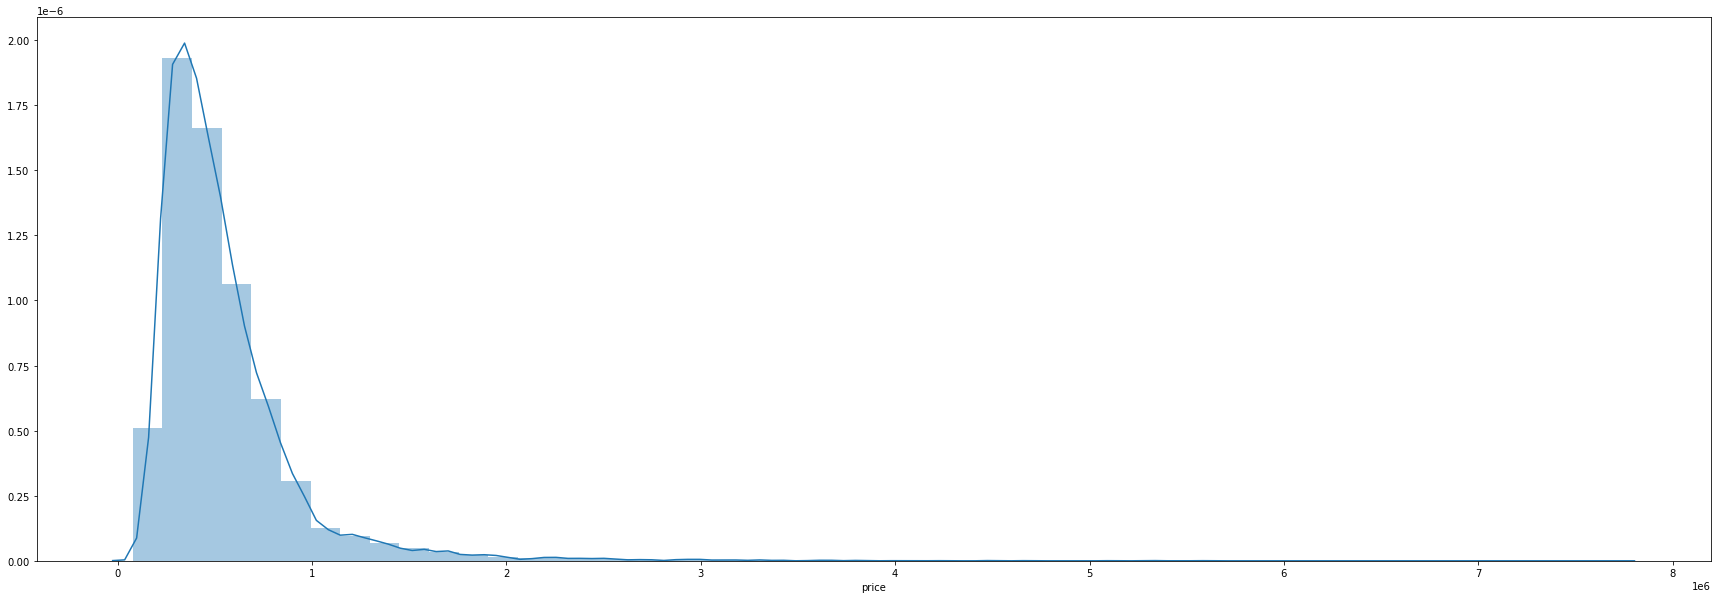

In [33]:
plt.figure(figsize=(30,10))
plt.tight_layout()
sns.distplot(df['price']);

The price is taken as a logarithm.

In [34]:
df['log_price'] = [math.log(element) for element in df['price']]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated,log_price
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,13,10,2014,0.0,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,9,12,2014,1.0,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,25,2,2015,NaN,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,9,12,2014,0.0,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,18,2,2015,0.0,13.142166


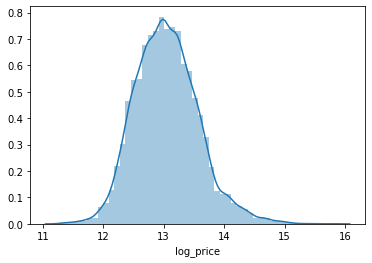

<Figure size 720x720 with 0 Axes>

In [35]:
x = df.log_price
sns.distplot(x);
plt.figure(figsize=(10,10));

In [36]:
log_price = df["log_price"]
fig = px.scatter(df, x = "long", y = "lat", color = "log_price", size = "sqft_living", hover_data = ["price", "bedrooms", "bathrooms"])
                
fig.write_html("plots/scatter_long_lat.html")

## Dependencies of the Variables

In [37]:
#sns.pairplot(df);

In [38]:
fig_scatter = px.scatter(df, x = "bathrooms", y = "bedrooms", color = "log_price", 
                         size = "sqft_living", hover_data = ["zipcode"], trendline = "ols")
fig_scatter.write_html("plots/scatter_bathrooms_bedrooms.html")

In [39]:
fig_scatter = px.scatter(df, x = "bathrooms", y = "log_price", color = "bedrooms", 
                         size = "sqft_living", hover_data = ["zipcode"], trendline = "ols")
fig_scatter.write_html("plots/scatter_bathrooms_log_price.html")

In [40]:
fig_scatter = px.scatter(df, x = "sqft_living", y = "log_price", color = "bathrooms", 
                         size = "bedrooms", hover_data = ["zipcode"], trendline = "ols")
fig_scatter.write_html("plots/scatter_sqft_living_log_price.html")

In [41]:
fig_scatter = px.scatter(df, x = "sqft_lot", y = "log_price", color = "bathrooms", 
                         size = "bedrooms", hover_data = ["zipcode"], trendline = "ols")
fig_scatter.write_html("plots/scatter_sqft_lot_log_price.html")

In [42]:
fig_scatter = px.scatter(df, x = "grade", y = "log_price", color = "bathrooms", 
                         size = "bedrooms", hover_data = ["zipcode"])
fig_scatter.write_html("plots/scatter_grade_log_price.html")

In [43]:
fig_scatter = px.scatter(df, x = "grade", y = "condition", color = "bathrooms", 
                         size = "bedrooms", hover_data = ["zipcode"])
fig_scatter.write_html("plots/scatter_grade_condition.html")

---

# Correlation analyis

In [44]:
pd.set_option("display.max_columns", None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated,log_price
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,13,10,2014,0.0,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,9,12,2014,1.0,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,25,2,2015,NaN,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,9,12,2014,0.0,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,18,2,2015,0.0,13.142166


In [45]:
explanatory_vars = list(df.columns)
explanatory_vars = [e for e in explanatory_vars 
                        if e not in ('id', "date")]

In [46]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))

R squared for each possible explanatory variable:
price   	 	= 1.0
bedrooms 	 	= 0.0998
bathrooms 	 	= 0.277
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.066
waterfront 	 	= 0.0683
view    	 	= 0.155
condition 	 	= 0.0013
grade   	 	= 0.446
sqft_above 	 	= 0.366
sqft_basement 	 	= 0.106
yr_built 	 	= 0.00291
yr_renovated 	 	= 0.0168
zipcode 	 	= 0.00285
lat     	 	= 0.0941
long    	 	= 0.000486
sqft_living15 	 	= 0.343
sqft_lot15 	 	= 0.00686
date_day 	 	= 0.000216
date_month 	 	= 9.85e-05
date_year 	 	= 1.4e-05
renovated 	 	= 0.0167
log_price 	 	= 0.795


In [47]:
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    smf.ols(formula=model, data=df).fit().summary()

## Multiple Regression Model

In [48]:
model = 'price ~ bathrooms + sqft_living + view + grade + lat + sqft_living15 + renovated'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     4507.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:49   Log-Likelihood:            -2.4372e+05
No. Observations:               17754   AIC:                         4.875e+05
Df Residuals:                   17746   BIC:                         4.875e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.204e+07   5.75e+05    -55.687      0.000   -3.32e+07   -3.09e+07
bathrooms     -2.026e+04   3394.446     -5.968      0.000   -2.69e+04   -1.36e+04
sqft_living     184.8974      3.673     50.340      0.000     177.698     192.097
view           9.539e+04   2305.302     41.377      0.000    9.09e+04    9.99e+04
grade           8.07e+04   2410.833     33.475      0.000     7.6e+04    8.54e+04
lat            6.641e+05   1.21e+04     54.744      0.000     6.4e+05    6.88e+05
sqft_living15     5.4880      3.977      1.380      0.168      -2.308      13.284
renovated      1.362e+05   8380.636     16.254      0.000     1.2e+05    1.53e+05
==============================================================================
Omnibus:                    16183.309   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1738306.259
Skew:                           3.993   Prob(JB):                         0.00
Kurtosis:                      50.813   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model = 'price ~ bathrooms + sqft_living + lat + grade + sqft_living15 + renovated'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     4535.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:49   Log-Likelihood:            -2.4454e+05
No. Observations:               17754   AIC:                         4.891e+05
Df Residuals:                   17747   BIC:                         4.891e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.157e+07   6.02e+05    -52.416      0.000   -3.28e+07   -3.04e+07
bathrooms     -2.829e+04   3548.495     -7.973      0.000   -3.52e+04   -2.13e+04
sqft_living     199.3593      3.829     52.072      0.000     191.855     206.864
lat            6.531e+05   1.27e+04     51.432      0.000    6.28e+05    6.78e+05
grade          8.453e+04   2522.520     33.510      0.000    7.96e+04    8.95e+04
sqft_living15    20.8372      4.147      5.025      0.000      12.709      28.965
renovated      1.706e+05   8732.014     19.542      0.000    1.54e+05    1.88e+05
==============================================================================
Omnibus:                    16365.034   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1600931.451
Skew:                           4.107   Prob(JB):                         0.00
Kurtosis:                      48.790   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model = 'price ~ bathrooms + sqft_living + renovated + grade + lat'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     5430.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:49   Log-Likelihood:            -2.4455e+05
No. Observations:               17754   AIC:                         4.891e+05
Df Residuals:                   17748   BIC:                         4.892e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.148e+07   6.02e+05    -52.250      0.000   -3.27e+07   -3.03e+07
bathrooms   -2.971e+04   3539.713     -8.393      0.000   -3.66e+04   -2.28e+04
sqft_living   207.9496      3.428     60.661      0.000     201.230     214.669
renovated    1.684e+05   8726.119     19.293      0.000    1.51e+05    1.85e+05
grade        8.877e+04   2378.573     37.322      0.000    8.41e+04    9.34e+04
lat           6.51e+05   1.27e+04     51.260      0.000    6.26e+05    6.76e+05
==============================================================================
Omnibus:                    16211.062   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1518452.709
Skew:                           4.057   Prob(JB):                         0.00
Kurtosis:                      47.574   Cond. No.                     7.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train- und Test-Set

In [51]:
df = df.replace(np.NaN, 0)

In [52]:
X = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]]
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14469, 18), (7127, 18), (14469,), (7127,))

In [53]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## MAPE

$$ MAPE = \frac{1}{n} * Σ\frac{|actual – prediction|}{|actual|} * 100 $$

In [54]:
(np.mean(np.abs(y_test - y_pred)/y_test)) * 100
print("MAPE-Testset: ", (np.mean(np.abs(y_test - y_pred)/y_test)) * 100)

MAPE-Testset:  25.726293032655583


In [55]:
print(regressor.intercept_)

6009956.098726663


In [56]:
print(regressor.coef_)

[-3.66500793e+04  4.45696014e+04  8.77898309e+01  8.51314747e-02
  9.03076397e+03  5.86874264e+05  5.24129718e+04  2.79004429e+04
  9.97670227e+04  8.11702615e+01  6.53573535e+01 -2.66573648e+03
  2.23338248e+01 -5.65239299e+02  5.83158244e+05 -2.14578720e+05
  2.98607650e+01 -4.47800877e-01]


In [57]:
X = df[["bathrooms", "sqft_living", "renovated", "grade", "lat"]]
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("MAPE-Testset: ", (np.mean(np.abs(y_test - y_pred)/y_test)) * 100)

MAPE-Testset:  28.35177682409485


In [58]:
model = ('log_price ~ bathrooms +  sqft_living + lat + renovated + grade')
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:49   Log-Likelihood:                -3486.8
No. Observations:               21596   AIC:                             6986.
Df Residuals:                   21590   BIC:                             7033.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -58.4051      0.669    -87.300      0.000     -59.716     -57.094
bathrooms      -0.0004      0.004     -0.089      0.929      -0.008       0.007
sqft_living     0.0002    3.8e-06     60.972      0.000       0.000       0.000
lat             1.4668      0.014    104.001      0.000       1.439       1.494
renovated       0.2017      0.011     18.962      0.000       0.181       0.223
grade           0.1574      0.003     59.810      0.000       0.152       0.163
==============================================================================
Omnibus:                      629.035   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.808
Skew:                           0.282   Prob(JB):                    1.58e-216
Kurtosis:                       3.887   Cond. No.                     7.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
X = df[["bathrooms", "sqft_living", "lat","renovated", "grade"]]
y = df.log_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

(np.mean(np.abs(y_test - y_pred)/y_test)) * 100
print("MAPE-Testset: ", (np.mean(np.abs(y_test - y_pred)/y_test)) * 100)

MAPE-Testset:  1.672778939351855


## Dummy Variables

In [60]:
continuous_var = list(df.select_dtypes(
                        ['int64','float64','bool']).columns.values)
continuous_var.remove('id')
continuous_var.remove('waterfront')
continuous_var.remove('view')
continuous_var.remove('condition')
continuous_var.remove('zipcode')
continuous_var.remove('yr_renovated')
categorical_var=['waterfront','view', 'condition', 'zipcode']
continuous_var, categorical_var

(['price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'date_day',
  'date_month',
  'date_year',
  'renovated',
  'log_price'],
 ['waterfront', 'view', 'condition', 'zipcode'])

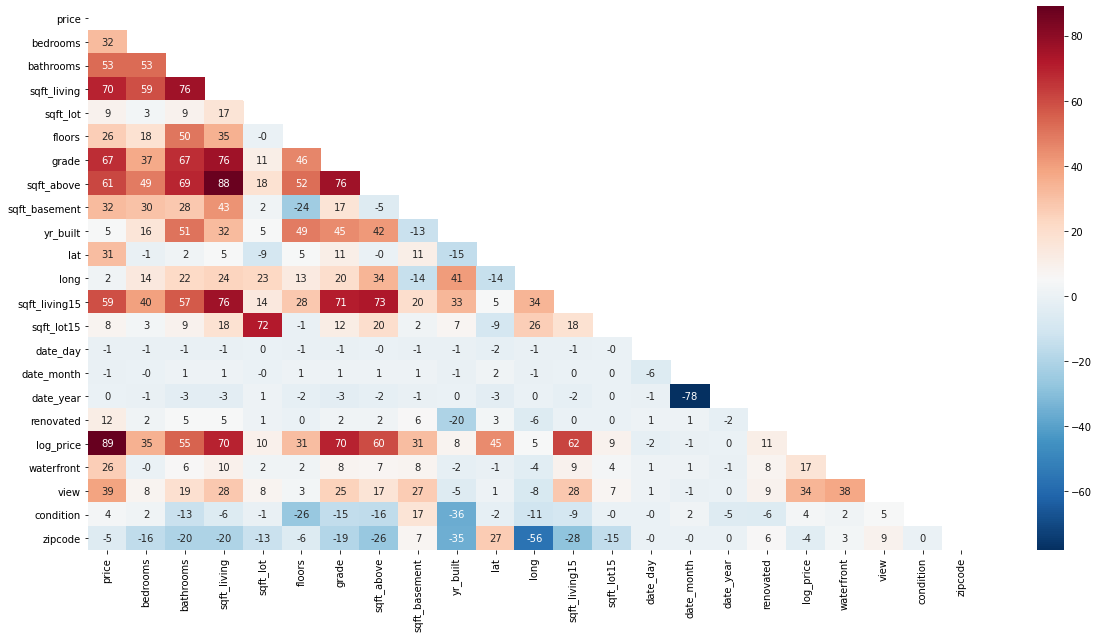

In [61]:
df = pd.get_dummies(df[continuous_var+categorical_var].copy())
mask = np.triu(df.corr())
plt.figure(figsize = (20,10))
ax = sns.heatmap(round(df.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='RdBu_r')

In [62]:
df = pd.get_dummies(df, columns=['view', 'waterfront', 'condition', 'zipcode'], drop_first=True)
df = df.rename(columns={"waterfront_1.0": "waterfront_1", "view_1.0": "view_1", "view_2.0": "view_2", "view_3.0": "view_3", "view_4.0": "view_4"})

In [63]:
df.nunique()

price            3622
bedrooms           11
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
grade              11
sqft_above        942
sqft_basement     303
yr_built          116
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
date_day           31
date_month         12
date_year           2
renovated           2
log_price        3622
view_1              2
view_2              2
view_3              2
view_4              2
waterfront_1        2
condition_2         2
condition_3         2
condition_4         2
condition_5         2
zipcode_98002       2
zipcode_98003       2
                 ... 
zipcode_98092       2
zipcode_98102       2
zipcode_98103       2
zipcode_98105       2
zipcode_98106       2
zipcode_98107       2
zipcode_98108       2
zipcode_98109       2
zipcode_98112       2
zipcode_98115       2
zipcode_98116       2
zipcode_98117       2
zipcode_98118       2
zipcode_98119       2
zipcode_98

In [64]:
explanatory_vars = list(df.columns)
explanatory_vars = [e for e in explanatory_vars 
                        if e not in ('id', "date")]

In [65]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))

R squared for each possible explanatory variable:
price   	 	= 1.0
bedrooms 	 	= 0.0998
bathrooms 	 	= 0.277
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.066
grade   	 	= 0.446
sqft_above 	 	= 0.366
sqft_basement 	 	= 0.103
yr_built 	 	= 0.00291
lat     	 	= 0.0941
long    	 	= 0.000486
sqft_living15 	 	= 0.343
sqft_lot15 	 	= 0.00686
date_day 	 	= 0.000216
date_month 	 	= 9.85e-05
date_year 	 	= 1.4e-05
renovated 	 	= 0.0138
log_price 	 	= 0.795
view_1  	 	= 0.00857
view_2  	 	= 0.0217
view_3  	 	= 0.0335
view_4  	 	= 0.0918
waterfront_1 	 	= 0.0683
condition_2 	 	= 0.00265
condition_3 	 	= 4.85e-05
condition_4 	 	= 0.000946
condition_5 	 	= 0.00331
zipcode_98002 	 	= 0.00645
zipcode_98003 	 	= 0.0059
zipcode_98004 	 	= 0.0735
zipcode_98005 	 	= 0.00423
zipcode_98006 	 	= 0.0179
zipcode_98007 	 	= 0.000288
zipcode_98008 	 	= 0.00109
zipcode_98010 	 	= 0.000469
zipcode_98011 	 	= 0.000168
zipcode_98014 	 	= 0.000307
zipcode_98019 	 	= 0.000877
zipcode_98022 	 	= 0.00404


In [66]:
str = ""
for explanatory_var in explanatory_vars:
    str += ('{} +  '.format(explanatory_var))
    
print( str)

price +  bedrooms +  bathrooms +  sqft_living +  sqft_lot +  floors +  grade +  sqft_above +  sqft_basement +  yr_built +  lat +  long +  sqft_living15 +  sqft_lot15 +  date_day +  date_month +  date_year +  renovated +  log_price +  view_1 +  view_2 +  view_3 +  view_4 +  waterfront_1 +  condition_2 +  condition_3 +  condition_4 +  condition_5 +  zipcode_98002 +  zipcode_98003 +  zipcode_98004 +  zipcode_98005 +  zipcode_98006 +  zipcode_98007 +  zipcode_98008 +  zipcode_98010 +  zipcode_98011 +  zipcode_98014 +  zipcode_98019 +  zipcode_98022 +  zipcode_98023 +  zipcode_98024 +  zipcode_98027 +  zipcode_98028 +  zipcode_98029 +  zipcode_98030 +  zipcode_98031 +  zipcode_98032 +  zipcode_98033 +  zipcode_98034 +  zipcode_98038 +  zipcode_98039 +  zipcode_98040 +  zipcode_98042 +  zipcode_98045 +  zipcode_98052 +  zipcode_98053 +  zipcode_98055 +  zipcode_98056 +  zipcode_98058 +  zipcode_98059 +  zipcode_98065 +  zipcode_98070 +  zipcode_98072 +  zipcode_98074 +  zipcode_98075 +  zipc

In [67]:
model = ('log_price ~ bedrooms +  bathrooms +  sqft_living +  sqft_lot +  floors +  sqft_above +  sqft_basement +  yr_built +  lat +  long +  sqft_living15 +  sqft_lot15 +  date_day +  date_month +  date_year +  renovated +  view_1 +  view_2 +  view_3 +  view_4 +  waterfront_1 +  condition_2 +  condition_3 +  condition_4 +  condition_5 +  grade  +  zipcode_98002 +  zipcode_98003 +  zipcode_98004 +  zipcode_98005 +  zipcode_98006 +  zipcode_98007 +  zipcode_98008 +  zipcode_98010 +  zipcode_98011 +  zipcode_98014 +  zipcode_98019 +  zipcode_98022 +  zipcode_98023 +  zipcode_98024 +  zipcode_98027 +  zipcode_98028 +  zipcode_98029 +  zipcode_98030 +  zipcode_98031 +  zipcode_98032 +  zipcode_98033 +  zipcode_98034 +  zipcode_98038 +  zipcode_98039 +  zipcode_98040 +  zipcode_98042 +  zipcode_98045 +  zipcode_98052 +  zipcode_98053 +  zipcode_98055 +  zipcode_98056 +  zipcode_98058 +  zipcode_98059 +  zipcode_98065 +  zipcode_98070 +  zipcode_98072 +  zipcode_98074 +  zipcode_98075 +  zipcode_98077 +  zipcode_98092 +  zipcode_98102 +  zipcode_98103 +  zipcode_98105 +  zipcode_98106 +  zipcode_98107 +  zipcode_98108 +  zipcode_98109 +  zipcode_98112 +  zipcode_98115 +  zipcode_98116 +  zipcode_98117 +  zipcode_98118 +  zipcode_98119 +  zipcode_98122 +  zipcode_98125 +  zipcode_98126 +  zipcode_98133 +  zipcode_98136 +  zipcode_98144 +  zipcode_98146 +  zipcode_98148 +  zipcode_98155 +  zipcode_98166 +  zipcode_98168 +  zipcode_98177 +  zipcode_98178 +  zipcode_98188 +  zipcode_98198 +  zipcode_98199')
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1657.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:53   Log-Likelihood:                 6087.8
No. Observations:               21596   AIC:                        -1.198e+04
Df Residuals:                   21500   BIC:                        -1.122e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -194.6001     11.127    -17.489      0.000    -216.410    -172.790
bedrooms          0.0029      0.002      1.566      0.117      -0.001       0.006
bathrooms         0.0411      0.003     13.686      0.000       0.035       0.047
sqft_living       0.0001   1.65e-05      7.074      0.000    8.43e-05       0.000
sqft_lot       6.228e-07   4.38e-08     14.225      0.000    5.37e-07    7.09e-07
floors           -0.0303      0.004     -8.404      0.000      -0.037      -0.023
sqft_above     8.162e-05   1.65e-05      4.945      0.000    4.93e-05       0.000
sqft_basement  8.305e-06   1.63e-05      0.509      0.611   -2.37e-05    4.03e-05
yr_built         -0.0005   7.39e-05     -7.002      0.000      -0.001      -0.000
lat               0.4975      0.072      6.887      0.000       0.356       0.639
long             -0.3762      0.052     -7.253      0.000      -0.478      -0.275
sqft_living15  8.446e-05    3.3e-06     25.626      0.000     7.8e-05    9.09e-05
sqft_lot15     7.641e-08   6.89e-08      1.109      0.268   -5.87e-08    2.11e-07
date_day         -0.0002      0.000     -1.343      0.179      -0.000    8.97e-05
date_month        0.0030      0.001      4.625      0.000       0.002       0.004
date_year         0.0680      0.004     15.768      0.000       0.060       0.076
renovated         0.0777      0.007     10.643      0.000       0.063       0.092
view_1            0.1185      0.010     11.372      0.000       0.098       0.139
view_2            0.1025      0.006     16.101      0.000       0.090       0.115
view_3            0.1669      0.009     19.172      0.000       0.150       0.184
view_4            0.2817      0.013     21.633      0.000       0.256       0.307
waterfront_1      0.4109      0.018     22.687      0.000       0.375       0.446
condition_2       0.1409      0.037      3.818      0.000       0.069       0.213
condition_3       0.2815      0.034      8.217      0.000       0.214       0.349
condition_4       0.3306      0.034      9.649      0.000       0.263       0.398
condition_5       0.3971      0.034     11.520      0.000       0.330       0.465
grade             0.0929      0.002     44.616      0.000       0.089       0.097
zipcode_98002    -0.0165      0.016     -1.003      0.316      -0.049       0.016
zipcode_98003    -0.0121      0.015     -0.819      0.413      -0.041       0.017
zipcode_98004     0.9517      0.027     35.530      0.000       0.899       1.004
zipcode_98005     0.6039      0.029     21.096      0.000       0.548       0.660
zipcode_98006     0.5294      0.023     22.617      0.000       0.484       0.575
zipcode_98007     0.5364      0.030     18.155      0.000       0.478       0.594
zipcode_98008     0.5411      0.028     19.286      0.000       0.486       0.596
zipcode_98010     0.3250      0.025     12.941   

In [68]:
model = ('log_price ~ bathrooms +  sqft_living +  sqft_lot +  floors +  sqft_above +  yr_built +  lat +  long +  sqft_living15 +  date_month +  date_year +  renovated +  view_1 +  view_2 +  view_3 +  view_4 +  waterfront_1 +  condition_2 +  condition_3 +  condition_4 +  condition_5 +  zipcode_98004 +  zipcode_98005 +  zipcode_98006 +  zipcode_98007 +  zipcode_98008 +  zipcode_98010 +  zipcode_98011 +  zipcode_98014 +  zipcode_98019 +  zipcode_98022 +  zipcode_98023 +  zipcode_98024 +  zipcode_98027 +  zipcode_98028 +  zipcode_98029 +  zipcode_98032 +  zipcode_98033 +  zipcode_98034 +  zipcode_98038 +  zipcode_98039 +  zipcode_98040 +  zipcode_98042 +  zipcode_98045 +  zipcode_98052 +  zipcode_98053 +  zipcode_98055 +  zipcode_98056 +  zipcode_98058 +  zipcode_98059 +  zipcode_98065 +  zipcode_98070 +  zipcode_98072 +  zipcode_98074 +  zipcode_98075 +  zipcode_98077 +  zipcode_98092 +  zipcode_98102 +  zipcode_98103 +  zipcode_98105 +  zipcode_98106 +  zipcode_98107 +  zipcode_98108 +  zipcode_98109 +  zipcode_98112 +  zipcode_98115 +  zipcode_98116 +  zipcode_98117 +  zipcode_98118 +  zipcode_98119 +  zipcode_98122 +  zipcode_98125 +  zipcode_98126 +  zipcode_98133 +  zipcode_98136 +  zipcode_98144 +  zipcode_98146 +  zipcode_98155 +  zipcode_98166 +  zipcode_98177 + zipcode_98199')
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1749.
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:43:53   Log-Likelihood:                 5089.5
No. Observations:               21596   AIC:                        -1.002e+04
Df Residuals:                   21514   BIC:                            -9361.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -188.0864     10.801    -17.413      0.000    -209.258    -166.915
bathrooms         0.0472      0.003     15.360      0.000       0.041       0.053
sqft_living       0.0002   4.03e-06     37.423      0.000       0.000       0.000
sqft_lot       6.986e-07   3.48e-08     20.098      0.000     6.3e-07    7.67e-07
floors           -0.0288      0.004     -7.658      0.000      -0.036      -0.021
sqft_above        0.0001   4.25e-06     25.585      0.000       0.000       0.000
yr_built          0.0005   7.33e-05      6.223      0.000       0.000       0.001
lat               0.5692      0.045     12.520      0.000       0.480       0.658
long             -0.3113      0.045     -6.896      0.000      -0.400      -0.223
sqft_living15     0.0001   3.32e-06     37.075      0.000       0.000       0.000
date_month        0.0028      0.001      4.121      0.000       0.001       0.004
date_year         0.0663      0.004     14.742      0.000       0.057       0.075
renovated         0.0908      0.008     11.901      0.000       0.076       0.106
view_1            0.1230      0.011     11.302      0.000       0.102       0.144
view_2            0.1194      0.007     17.998      0.000       0.106       0.132
view_3            0.1901      0.009     20.957      0.000       0.172       0.208
view_4            0.3158      0.014     23.262      0.000       0.289       0.342
waterfront_1      0.4139      0.019     21.865      0.000       0.377       0.451
condition_2       0.1929      0.039      4.999      0.000       0.117       0.268
condition_3       0.3574      0.036      9.990      0.000       0.287       0.428
condition_4       0.4068      0.036     11.372      0.000       0.337       0.477
condition_5       0.4736      0.036     13.157      0.000       0.403       0.544
zipcode_98004     0.9689      0.016     60.647      0.000       0.938       1.000
zipcode_98005     0.6250      0.019     32.612      0.000       0.587       0.663
zipcode_98006     0.5479      0.014     39.895      0.000       0.521       0.575
zipcode_98007     0.5468      0.020     26.787      0.000       0.507       0.587
zipcode_98008     0.5337      0.017     30.633      0.000       0.500       0.568
zipcode_98010     0.2846      0.023     12.431      0.000       0.240       0.329
zipcode_98011     0.2118      0.022      9.496      0.000       0.168       0.255
zipcode_98014     0.2018      0.029      6.883      0.000       0.144       0.259
zipcode_98019     0.1499      0.026      5.739      0.000       0.099       0.201
zipcode_98022     0.1603      0.019      8.322      0.000       0.123       0.198
zipcode_98023    -0.0525      0.011     -4.663      0.000      -0.075      -0.030
zipcode_98024     0.3614      0.029     12.675      0.000       0.305       0.417
zipcode_98027     0.4608      0.016     29.192   

In [69]:
X = df[["bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "yr_built", "lat" , "long", "sqft_living15" , "date_month", "date_year", "renovated", "view_1", "view_2", "view_3", "view_4", "waterfront_1", "condition_2", "condition_3", "condition_4", "condition_5", "zipcode_98004", "zipcode_98005", "zipcode_98006", "zipcode_98007", "zipcode_98008", "zipcode_98010", "zipcode_98011", "zipcode_98014", "zipcode_98019", "zipcode_98022", "zipcode_98023", "zipcode_98024", "zipcode_98027", "zipcode_98028", "zipcode_98029", "zipcode_98032", "zipcode_98033", "zipcode_98034", "zipcode_98038", "zipcode_98039", "zipcode_98040", "zipcode_98042", "zipcode_98045", "zipcode_98052", "zipcode_98053", "zipcode_98055", "zipcode_98056", "zipcode_98058", "zipcode_98059", "zipcode_98065", "zipcode_98070", "zipcode_98072", "zipcode_98074", "zipcode_98075", "zipcode_98077", "zipcode_98092", "zipcode_98102", "zipcode_98103", "zipcode_98105" , "zipcode_98106", "zipcode_98107" , "zipcode_98108", "zipcode_98109", "zipcode_98112", "zipcode_98115", "zipcode_98116" ,"zipcode_98117", "zipcode_98118", "zipcode_98119", "zipcode_98122", "zipcode_98125", "zipcode_98126", "zipcode_98133", "zipcode_98136", "zipcode_98144", "zipcode_98146" , "zipcode_98155", "zipcode_98166" , "zipcode_98177", "zipcode_98199"]]
y = df.log_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

(np.mean(np.abs(y_test - y_pred)/y_test)) * 100
print("MAPE-Testset: ", (np.mean(np.abs(y_test - y_pred)/y_test)) * 100)

MAPE-Testset:  1.0806545650588895


# Recommendations

1. more living spaces
2. better grade
3. renovate house

---

# _Lasso and Ridge Regression_

In [70]:
#Xs = df.drop(["log_price"], axis = 1)
#y = df["log_price"].values.reshape(-1,1)
#
#from sklearn.linear_model import Lasso
#from sklearn.model_selection import GridSearchCV
#lasso = Lasso()
#parameters = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
#
#lasso_regressor = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 5)
#lasso_regressor.fit(Xs, y)
#
#print(lasso_regressor.best_params_)
#print(lasso_regressor.best_score_)

In [71]:
#lambdas = (1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20)
#l_num = 10
#pred_num = X.shape[1]
#
## prepare data for enumerate
#coeff_a = np.zeros((l_num, pred_num))
#train_r_squared = np.zeros(l_num)
#test_r_squared = np.zeros(l_num)

In [72]:
# enumerate through lambdas with index and i
#for ind, i in enumerate(lambdas):    
#    reg = Lasso(alpha = i)
#    reg.fit(X_train, y_train)
#
#    coeff_a[ind,:] = reg.coef_
#    train_r_squared[ind] = reg.score(X_train, y_train)
#    test_r_squared[ind] = reg.score(X_test, y_test)

In [73]:
# Plotting
#plt.figure(figsize=(18, 8))
#plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
#plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
#plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
#plt.xlim(0, 9)
#plt.title(r'Evaluate lasso regression with lamdas: 1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20')
#plt.legend(loc='best')
#plt.grid()

In [74]:
## Import StandardScaler
#from sklearn.preprocessing import StandardScaler
## Create features and target matrixes
#X = df[["bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "yr_built", "lat" , "long", "sqft_living15" , "date_month", "date_year", "renovated", "view_1", "view_2", "view_3", "view_4", "waterfront_1", "condition_2", "condition_3", "condition_4", "condition_5", "zipcode_98004", "zipcode_98005", "zipcode_98006", "zipcode_98007", "zipcode_98008", "zipcode_98010", "zipcode_98011", "zipcode_98014", "zipcode_98019", "zipcode_98022", "zipcode_98023", "zipcode_98024", "zipcode_98027", "zipcode_98028", "zipcode_98029", "zipcode_98032", "zipcode_98033", "zipcode_98034", "zipcode_98038", "zipcode_98039", "zipcode_98040", "zipcode_98042", "zipcode_98045", "zipcode_98052", "zipcode_98053", "zipcode_98055", "zipcode_98056", "zipcode_98058", "zipcode_98059", "zipcode_98065", "zipcode_98070", "zipcode_98072", "zipcode_98074", "zipcode_98075", "zipcode_98077", "zipcode_98092", "zipcode_98102", "zipcode_98103", "zipcode_98105" , "zipcode_98106", "zipcode_98107" , "zipcode_98108", "zipcode_98109", "zipcode_98112", "zipcode_98115", "zipcode_98116" ,"zipcode_98117", "zipcode_98118", "zipcode_98119", "zipcode_98122", "zipcode_98125", "zipcode_98126", "zipcode_98133", "zipcode_98136", "zipcode_98144", "zipcode_98146" , "zipcode_98155", "zipcode_98166" , "zipcode_98177", "zipcode_98199"]]
#y = df[['log_price']]
## Scale data 
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

In [75]:
## Import linear models
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error
## Create lasso and ridge objects
#lasso = linear_model.Lasso()
#ridge = linear_model.Ridge()
## Fit the models
#lasso.fit(X, y)
#ridge.fit(X, y)
## Print scores, MSE, and coefficients
#print("lasso score:", lasso.score(X, y))
#print("ridge score:",ridge.score(X, y))
#print("lasso MSE:", mean_squared_error(y, lasso.predict(X)))
#print("ridge MSE:", mean_squared_error(y, ridge.predict(X)))
#print("lasso coef:", lasso.coef_)
#print("ridge coef:", ridge.coef_)

In [76]:
## Make necessary imports, split data into training and test sets, and choose a set of parameters 
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings("ignore")
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
#parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
#
#linear = linear_model.LinearRegression()
#lasso = linear_model.Lasso()
#ridge = linear_model.Ridge()
#gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
#gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
#
## Fit models and print the best parameters, R-squared scores, MSE, and coefficients
#gridlasso.fit(X_train, y_train)
#gridridge.fit(X_train, y_train)
#linear.fit(X_train, y_train)
#print("ridge best parameters:", gridridge.best_params_)
#print("lasso best parameters:", gridlasso.best_params_)
#print("ridge score:", gridridge.score(X_test, y_test))
#print("lasso score:", gridlasso.score(X_test, y_test))
#print("linear score:", linear.score(X_test, y_test))
#print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
#print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
#print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test)))
#print("ridge best estimator coef:", gridridge.best_estimator_.coef_)
#print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
#print("linear coef:", linear.coef_)

In [77]:
## Import library for visualization
#import matplotlib.pyplot as plt
#coefsLasso = []
#coefsRidge = []
## Build Ridge and Lasso for 200 values of alpha and write the coefficients into array
#alphasLasso = np.arange (0, 20, 0.1)
#alphasRidge = np.arange (0, 200, 1)
#for i in range(200):
#    lasso = linear_model.Lasso(alpha=alphasLasso[i])
#    lasso.fit(X_train, y_train)
#    coefsLasso.append(lasso.coef_)
#    ridge = linear_model.Ridge(alpha=alphasRidge[i])
#    ridge.fit(X_train, y_train)
#    coefsRidge.append(ridge.coef_[0])
#
## Build Lasso and Ridge coefficient plots
#plt.figure(figsize = (30,20))
#
#plt.subplot(121)
#plt.plot(alphasLasso, coefsLasso)
#plt.title('Lasso coefficients')
#plt.xlabel('alpha')
#plt.ylabel('coefs')
#
#plt.subplot(122)
#plt.plot(alphasRidge, coefsRidge)
#plt.title('Ridge coefficients')
#plt.xlabel('alpha')
#plt.ylabel('coefs')
#
#plt.show()